In [1]:
import pandas as pd
import numpy as np
coaches = pd.read_csv('https://raw.githubusercontent.com/2SUBDA/IST_718/master/Coaches9.csv') #call the data from the Github Repository and load into a pandas DataFrame
coaches.head()

,School,Conference,Coach,SchoolPay,TotalPay,Bonus,BonusPaid,AssistantPay,Buyout
0,Air Force,Mt. West,Troy Calhoun,885000,885000,247000,--,$0,--
1,Akron,MAC,Terry Bowden,"$411,000","$412,500","$225,000","$50,000",$0,"$688,500"
2,Alabama,SEC,Nick Saban,"$8,307,000","$8,307,000","$1,100,000","$500,000",$0,"$33,600,000"
3,Alabama at Birmingham,C-USA,Bill Clark,"$900,000","$900,000","$950,000","$165,471",$0,"$3,847,500"
4,Appalachian State,Sun Belt,Scott Satterfield,"$712,500","$712,500","$295,000","$145,000",$0,"$2,160,417"


In [2]:
# Create a function that can clean the observations we're seeing in the data and return them as a float
def moneyrepair(string):
    string = string.replace('$','')
    string = string.replace(',','')
    string = string.replace('--','-1')
    return(float(string))

In [3]:
#Unpivots the various pay into a single column of values
coaches = coaches.melt(id_vars=['School','Conference','Coach'], value_vars=['SchoolPay','TotalPay','Bonus','BonusPaid','AssistantPay','Buyout'])

In [4]:
coaches['value']=coaches['value'].apply(lambda x: moneyrepair(x)) #applying the cleaning formula

In [5]:
coaches # reviewing the data set

,School,Conference,Coach,variable,value
0,Air Force,Mt. West,Troy Calhoun,SchoolPay,885000.0
1,Akron,MAC,Terry Bowden,SchoolPay,411000.0
2,Alabama,SEC,Nick Saban,SchoolPay,8307000.0
3,Alabama at Birmingham,C-USA,Bill Clark,SchoolPay,900000.0
4,Appalachian State,Sun Belt,Scott Satterfield,SchoolPay,712500.0
...,...,...,...,...,...
769,West Virginia,Big 12,Dana Holgorsen,Buyout,7150000.0
770,Western Kentucky,C-USA,Mike Sanford Jr.,Buyout,1200000.0
771,Western Michigan,MAC,Tim Lester,Buyout,800000.0
772,Wisconsin,Big Ten,Paul Chryst,Buyout,6000000.0


In [6]:
#looking for values that are not informative for the coaches
droppedValues=coaches.groupby(['Coach','School']).sum('value').reset_index()
droppedValues.sort_values(by='value',ascending = True)


,Coach,School,value
62,Kalani Sitake,Brigham Young,-5.0
83,Matt Rhule,Baylor,-5.0
115,Sonny Dykes,Southern Methodist,-5.0
86,Mike Bloomgren,Rice,-5.0
84,Matt Viator,Louisiana-Monroe,1005000.0
...,...,...,...
43,Gus Malzahn,Auburn,47324406.0
25,Dabo Swinney,Clemson,49373350.0
97,Nick Saban,Alabama,51814000.0
125,Urban Meyer,Ohio State,54383402.0


In [7]:
#isolating the dropped values
droppedValues = droppedValues[droppedValues['value']==-5]
droppedValues.head()

,Coach,School,value
62,Kalani Sitake,Brigham Young,-5.0
83,Matt Rhule,Baylor,-5.0
86,Mike Bloomgren,Rice,-5.0
115,Sonny Dykes,Southern Methodist,-5.0


In [8]:
#Creating a variable
eliminate = droppedValues['Coach']

In [9]:
#Test formula for removing multiple values found on Stack Overflow
def filter_by_values(df, col, values):
    return df[~df[col].isin(values)]

In [10]:
#applying the test formula to the data set
coaches = filter_by_values(coaches, 'Coach',eliminate)

In [11]:
#replacing the -1 values with zero and recasting the data
coaches['value'] = coaches['value'].replace(-1,0)
coaches = coaches.pivot_table(index =['School','Conference','Coach'], columns='variable', values='value').reset_index()
print(coaches)

variable                 School Conference              Coach  AssistantPay  \
0                     Air Force   Mt. West       Troy Calhoun           0.0   
1                         Akron        MAC       Terry Bowden           0.0   
2                       Alabama        SEC         Nick Saban           0.0   
3         Alabama at Birmingham      C-USA         Bill Clark           0.0   
4             Appalachian State   Sun Belt  Scott Satterfield           0.0   
..                          ...        ...                ...           ...   
120               West Virginia     Big 12     Dana Holgorsen           0.0   
121            Western Kentucky      C-USA   Mike Sanford Jr.           0.0   
122            Western Michigan        MAC         Tim Lester           0.0   
123                   Wisconsin    Big Ten        Paul Chryst           0.0   
124                     Wyoming   Mt. West         Craig Bohl           0.0   

variable      Bonus  BonusPaid      Buyout  SchoolP

In [12]:
#calls in graduation rates and well as eligiblity rates for the spot
#The data was found on the NCAA website but was last updated in 2014
d1GradRates = pd.read_csv('GraduationRates.tsv', sep='\t')
d1GradRates.head()

,DATA_TAB_GENERALINFO,SCL_UNITID,SCL_NAME,SPORT_CODE,SPORT_NAME,ACADEMIC_YEAR,SCL_DIV_14,SCL_SUB_14,CONFNAME_14,D1_FB_CONF_14,...,PUB_AWARD_14,PUB_AWARD_13,PUB_AWARD_12,PUB_AWARD_11,PUB_AWARD_10,PUB_AWARD_09,PUB_AWARD_08,PUB_AWARD_07,PUB_AWARD_06,RAW_OR_CI
0,,100654,Alabama A&M University,20,Women's Bowling,2014,1,2,Southwestern Athletic Conf.,Southwestern Athletic Conf.,...,0,0,0,0,0,0,0,0,1,1
1,,100654,Alabama A&M University,14,"Men's Track, Indoor",2014,1,2,Southwestern Athletic Conf.,Southwestern Athletic Conf.,...,0,0,0,0,0,0,0,0,0,2
2,,100654,Alabama A&M University,4,Football,2014,1,2,Southwestern Athletic Conf.,Southwestern Athletic Conf.,...,0,0,0,0,0,0,0,0,0,2
3,,100654,Alabama A&M University,1,Baseball,2014,1,2,Southwestern Athletic Conf.,Southwestern Athletic Conf.,...,0,0,0,0,0,0,0,0,0,2
4,,100654,Alabama A&M University,19,Women's Basketball,2014,1,2,Southwestern Athletic Conf.,Southwestern Athletic Conf.,...,1,0,0,0,0,1,1,0,0,2


In [13]:
d1GradRates.columns

Index(['DATA_TAB_GENERALINFO', 'SCL_UNITID', 'SCL_NAME', 'SPORT_CODE',
       'SPORT_NAME', 'ACADEMIC_YEAR', 'SCL_DIV_14', 'SCL_SUB_14',
       'CONFNAME_14', 'D1_FB_CONF_14', 'SCL_HBCU', 'SCL_PRIVATE',
       'DATA_TAB_MULTIYRRATE', 'MULTIYR_APR_RATE_1000_RAW',
       'MULTIYR_APR_RATE_1000_CI', 'MULTIYR_APR_RATE_1000_OFFICIAL',
       'MULTIYR_ELIG_RATE', 'MULTIYR_RET_RATE', 'MULTIYR_SQUAD_SIZE',
       'DATA_TAB_ANNUALRATE', 'APR_RATE_2014_1000', 'ELIG_RATE_2014',
       'RET_RATE_2014', 'NUM_OF_ATHLETES_2014', 'APR_RATE_2013_1000',
       'ELIG_RATE_2013', 'RET_RATE_2013', 'NUM_OF_ATHLETES_2013',
       'APR_RATE_2012_1000', 'ELIG_RATE_2012', 'RET_RATE_2012',
       'NUM_OF_ATHLETES_2012', 'APR_RATE_2011_1000', 'ELIG_RATE_2011',
       'RET_RATE_2011', 'NUM_OF_ATHLETES_2011', 'APR_RATE_2010_1000',
       'ELIG_RATE_2010', 'RET_RATE_2010', 'NUM_OF_ATHLETES_2010',
       'APR_RATE_2009_1000', 'ELIG_RATE_2009', 'RET_RATE_2009',
       'NUM_OF_ATHLETES_2009', 'APR_RATE_2008_1000', 'ELI

In [14]:
#keeping graduation rates and eligibility rates from 2014 as these may be helpful in the model
d1GradRates=d1GradRates[d1GradRates['SPORT_CODE']==4] #filter for football records
d1GradRates = d1GradRates[['SCL_UNITID','SCL_NAME','MULTIYR_APR_RATE_1000_RAW',
       'MULTIYR_APR_RATE_1000_CI', 'MULTIYR_APR_RATE_1000_OFFICIAL',
       'MULTIYR_ELIG_RATE', 'MULTIYR_RET_RATE','APR_RATE_2014_1000', 
       'ELIG_RATE_2014','RET_RATE_2014']]
d1GradRates.head()

,SCL_UNITID,SCL_NAME,MULTIYR_APR_RATE_1000_RAW,MULTIYR_APR_RATE_1000_CI,MULTIYR_APR_RATE_1000_OFFICIAL,MULTIYR_ELIG_RATE,MULTIYR_RET_RATE,APR_RATE_2014_1000,ELIG_RATE_2014,RET_RATE_2014
2,100654,Alabama A&M University,932,945,932,0.886097,0.961279,905,0.810811,0.979730
35,100724,Alabama State University,876,894,876,0.852713,0.892996,902,0.879699,0.924812
67,100751,University of Alabama,978,985,978,0.978006,0.965361,1000,1.000000,0.987342
83,100858,Auburn University,968,976,968,0.966616,0.960998,985,0.988024,0.981707
92,101480,Jacksonville State University,942,953,942,0.924837,0.932231,965,0.968354,0.942308


In [15]:
schoolCode = d1GradRates[['SCL_UNITID','SCL_NAME']].drop_duplicates() #Checks if there are any duplicate records and drops them

In [16]:
d1GradRates[d1GradRates['SCL_UNITID']==100663] #searching for Alabama at Burmingham Grad data for Football

,SCL_UNITID,SCL_NAME,MULTIYR_APR_RATE_1000_RAW,MULTIYR_APR_RATE_1000_CI,MULTIYR_APR_RATE_1000_OFFICIAL,MULTIYR_ELIG_RATE,MULTIYR_RET_RATE,APR_RATE_2014_1000,ELIG_RATE_2014,RET_RATE_2014


In [17]:
#installs the fuzzywuzzy package and imports it's process functions
!pip3 install fuzzywuzzy
from fuzzywuzzy import process

  Using cached fuzzywuzzy-0.18.0-py2.py3-none-any.whl (18 kB)
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [18]:
coaches['FuzzySCL_NAME'] = coaches['School'].apply(lambda x: process.extractOne(x, schoolCode['SCL_NAME'])) #applies fuzzy match process to the Coaches Data Set

In [19]:
coaches['SCL_NAME'] = coaches['FuzzySCL_NAME'].apply(lambda x: x[0]) #extracts the school name from the fuzzy tuple
coaches

variable,School,Conference,Coach,AssistantPay,Bonus,BonusPaid,Buyout,SchoolPay,TotalPay,FuzzySCL_NAME,SCL_NAME
0,Air Force,Mt. West,Troy Calhoun,0.0,247000.0,0.0,0.0,885000.0,885000.0,"(U.S. Air Force Academy, 90, 820)",U.S. Air Force Academy
1,Akron,MAC,Terry Bowden,0.0,225000.0,50000.0,688500.0,411000.0,412500.0,"(University of Akron, 90, 4265)",University of Akron
2,Alabama,SEC,Nick Saban,0.0,1100000.0,500000.0,33600000.0,8307000.0,8307000.0,"(Alabama A&M University, 90, 2)",Alabama A&M University
3,Alabama at Birmingham,C-USA,Bill Clark,0.0,950000.0,165471.0,3847500.0,900000.0,900000.0,"(Southern Illinois University at Carbondale, 8...",Southern Illinois University at Carbondale
4,Appalachian State,Sun Belt,Scott Satterfield,0.0,295000.0,145000.0,2160417.0,712500.0,712500.0,"(Appalachian State University, 90, 3885)",Appalachian State University
...,...,...,...,...,...,...,...,...,...,...,...
120,West Virginia,Big 12,Dana Holgorsen,0.0,1000000.0,90000.0,7150000.0,3605000.0,3617500.0,"(West Virginia University, 90, 6350)",West Virginia University
121,Western Kentucky,C-USA,Mike Sanford Jr.,0.0,400000.0,0.0,1200000.0,800000.0,805850.0,"(Western Kentucky University, 90, 2157)",Western Kentucky University
122,Western Michigan,MAC,Tim Lester,0.0,346500.0,39250.0,800000.0,800000.0,800000.0,"(Western Michigan University, 90, 2823)",Western Michigan University
123,Wisconsin,Big Ten,Paul Chryst,0.0,0.0,290000.0,6000000.0,3750000.0,3750000.0,"(University of Wisconsin, Madison, 90, 6409)","University of Wisconsin, Madison"


In [20]:
#realigns mismatched names, this was reviewed by hand the list created to clean up
nameReview = coaches[['School','SCL_NAME']]
#pd.set_option('max_rows',None)
review = [2,3,5,9,16,29,33,34,40,42,44,47,48,51,52,60,69,73,79,84,86,99,100,115,105,106,111,112,116,118]
nameReview2 = nameReview.loc[review]
nameReview2.reset_index()
nameReview2['SCL_UNITID'] = [100751,100663,104179,197036,110635,134130,110556,139959,145637,153658,155317,157085,159391,160658,159993,170976,182290,199120,204796,209551,214777,221759,228778,234076,228796,229027,110662,230764,233921,236948]
nameReview2 = nameReview2[['School','SCL_UNITID']]
nameReview.drop(review, inplace = True)
#merges the two groups
coaches=coaches.merge(nameReview,how='left',on='School')
coaches=coaches.merge(nameReview2, how='left',on='School')

In [21]:
#Merges the school code
coaches=coaches.merge(schoolCode, how='left', left_on='SCL_NAME_y', right_on='SCL_NAME')
coaches['SCL_UNITID_x'].fillna(coaches['SCL_UNITID_y'], inplace =True)
coaches

,School,Conference,Coach,AssistantPay,Bonus,BonusPaid,Buyout,SchoolPay,TotalPay,FuzzySCL_NAME,SCL_NAME_x,SCL_NAME_y,SCL_UNITID_x,SCL_UNITID_y,SCL_NAME
0,Air Force,Mt. West,Troy Calhoun,0.0,247000.0,0.0,0.0,885000.0,885000.0,"(U.S. Air Force Academy, 90, 820)",U.S. Air Force Academy,U.S. Air Force Academy,128328.0,128328.0,U.S. Air Force Academy
1,Akron,MAC,Terry Bowden,0.0,225000.0,50000.0,688500.0,411000.0,412500.0,"(University of Akron, 90, 4265)",University of Akron,University of Akron,200800.0,200800.0,University of Akron
2,Alabama,SEC,Nick Saban,0.0,1100000.0,500000.0,33600000.0,8307000.0,8307000.0,"(Alabama A&M University, 90, 2)",Alabama A&M University,NaN,100751.0,NaN,NaN
3,Alabama at Birmingham,C-USA,Bill Clark,0.0,950000.0,165471.0,3847500.0,900000.0,900000.0,"(Southern Illinois University at Carbondale, 8...",Southern Illinois University at Carbondale,NaN,100663.0,NaN,NaN
4,Appalachian State,Sun Belt,Scott Satterfield,0.0,295000.0,145000.0,2160417.0,712500.0,712500.0,"(Appalachian State University, 90, 3885)",Appalachian State University,Appalachian State University,197869.0,197869.0,Appalachian State University
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,West Virginia,Big 12,Dana Holgorsen,0.0,1000000.0,90000.0,7150000.0,3605000.0,3617500.0,"(West Virginia University, 90, 6350)",West Virginia University,West Virginia University,238032.0,238032.0,West Virginia University
121,Western Kentucky,C-USA,Mike Sanford Jr.,0.0,400000.0,0.0,1200000.0,800000.0,805850.0,"(Western Kentucky University, 90, 2157)",Western Kentucky University,Western Kentucky University,157951.0,157951.0,Western Kentucky University
122,Western Michigan,MAC,Tim Lester,0.0,346500.0,39250.0,800000.0,800000.0,800000.0,"(Western Michigan University, 90, 2823)",Western Michigan University,Western Michigan University,172699.0,172699.0,Western Michigan University
123,Wisconsin,Big Ten,Paul Chryst,0.0,0.0,290000.0,6000000.0,3750000.0,3750000.0,"(University of Wisconsin, Madison, 90, 6409)","University of Wisconsin, Madison","University of Wisconsin, Madison",240444.0,240444.0,"University of Wisconsin, Madison"


In [22]:
#Drops the extra columns
coaches=coaches.drop(['FuzzySCL_NAME','SCL_NAME_x','SCL_UNITID_y','SCL_NAME'], axis=1)
coaches

,School,Conference,Coach,AssistantPay,Bonus,BonusPaid,Buyout,SchoolPay,TotalPay,SCL_NAME_y,SCL_UNITID_x
0,Air Force,Mt. West,Troy Calhoun,0.0,247000.0,0.0,0.0,885000.0,885000.0,U.S. Air Force Academy,128328.0
1,Akron,MAC,Terry Bowden,0.0,225000.0,50000.0,688500.0,411000.0,412500.0,University of Akron,200800.0
2,Alabama,SEC,Nick Saban,0.0,1100000.0,500000.0,33600000.0,8307000.0,8307000.0,NaN,100751.0
3,Alabama at Birmingham,C-USA,Bill Clark,0.0,950000.0,165471.0,3847500.0,900000.0,900000.0,NaN,100663.0
4,Appalachian State,Sun Belt,Scott Satterfield,0.0,295000.0,145000.0,2160417.0,712500.0,712500.0,Appalachian State University,197869.0
...,...,...,...,...,...,...,...,...,...,...,...
120,West Virginia,Big 12,Dana Holgorsen,0.0,1000000.0,90000.0,7150000.0,3605000.0,3617500.0,West Virginia University,238032.0
121,Western Kentucky,C-USA,Mike Sanford Jr.,0.0,400000.0,0.0,1200000.0,800000.0,805850.0,Western Kentucky University,157951.0
122,Western Michigan,MAC,Tim Lester,0.0,346500.0,39250.0,800000.0,800000.0,800000.0,Western Michigan University,172699.0
123,Wisconsin,Big Ten,Paul Chryst,0.0,0.0,290000.0,6000000.0,3750000.0,3750000.0,"University of Wisconsin, Madison",240444.0


In [23]:
#Merge in the graduation data for the schools
coaches = coaches.merge(d1GradRates, how='left', left_on='SCL_UNITID_x',right_on='SCL_UNITID')
coaches

,School,Conference,Coach,AssistantPay,Bonus,BonusPaid,Buyout,SchoolPay,TotalPay,SCL_NAME_y,...,SCL_UNITID,SCL_NAME,MULTIYR_APR_RATE_1000_RAW,MULTIYR_APR_RATE_1000_CI,MULTIYR_APR_RATE_1000_OFFICIAL,MULTIYR_ELIG_RATE,MULTIYR_RET_RATE,APR_RATE_2014_1000,ELIG_RATE_2014,RET_RATE_2014
0,Air Force,Mt. West,Troy Calhoun,0.0,247000.0,0.0,0.0,885000.0,885000.0,U.S. Air Force Academy,...,128328.0,U.S. Air Force Academy,980.0,986.0,980.0,0.981481,0.978328,985.0,0.981481,0.987654
1,Akron,MAC,Terry Bowden,0.0,225000.0,50000.0,688500.0,411000.0,412500.0,University of Akron,...,200800.0,University of Akron,947.0,957.0,947.0,0.934579,0.952681,962.0,0.947059,0.976471
2,Alabama,SEC,Nick Saban,0.0,1100000.0,500000.0,33600000.0,8307000.0,8307000.0,NaN,...,100751.0,University of Alabama,978.0,985.0,978.0,0.978006,0.965361,1000.0,1.000000,0.987342
3,Alabama at Birmingham,C-USA,Bill Clark,0.0,950000.0,165471.0,3847500.0,900000.0,900000.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Appalachian State,Sun Belt,Scott Satterfield,0.0,295000.0,145000.0,2160417.0,712500.0,712500.0,Appalachian State University,...,197869.0,Appalachian State University,960.0,970.0,960.0,0.955390,0.953008,967.0,0.985612,0.941606
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,West Virginia,Big 12,Dana Holgorsen,0.0,1000000.0,90000.0,7150000.0,3605000.0,3617500.0,West Virginia University,...,238032.0,West Virginia University,942.0,953.0,942.0,0.932476,0.938312,947.0,0.931677,0.950311
121,Western Kentucky,C-USA,Mike Sanford Jr.,0.0,400000.0,0.0,1200000.0,800000.0,805850.0,Western Kentucky University,...,157951.0,Western Kentucky University,947.0,958.0,947.0,0.951487,0.933858,924.0,0.924528,0.917722
122,Western Michigan,MAC,Tim Lester,0.0,346500.0,39250.0,800000.0,800000.0,800000.0,Western Michigan University,...,172699.0,Western Michigan University,955.0,965.0,955.0,0.943028,0.956386,951.0,0.940476,0.949045
123,Wisconsin,Big Ten,Paul Chryst,0.0,0.0,290000.0,6000000.0,3750000.0,3750000.0,"University of Wisconsin, Madison",...,240444.0,"University of Wisconsin, Madison",998.0,999.0,998.0,0.993967,0.989280,1000.0,1.000000,0.993827


In [24]:
#calls in the stadium capacity data and leaves just the college name and stadium capacity
stadcap = pd.read_excel('StadiumCapacity.xlsx')
stadcap = stadcap[['College','Capacity']]

In [25]:
#merged the data with the coaches data 
coaches=coaches.merge(stadcap, how = 'left', left_on = 'School', right_on='College')

In [26]:
#check how many schools had the capcacity
#manually looked up 13 by hand as removing them would remove 10% of the data set
coaches['Capacity'].isna().value_counts()

False    125
Name: Capacity, dtype: int64

In [27]:
#returned schools with no stadium capcity after the merge
#corrected by hand so should be blank result
coaches['capcheck'] = coaches['Capacity'].isna()
reviewschools=coaches[coaches['capcheck']==True]
reviewschools['School']

Series([], Name: School, dtype: object)

In [28]:
winLoss = pd.read_excel('WinLossRecord2019.xlsx')#calls in the win loss rate
winLoss['WinPercent']=winLoss['Win %'] #renames column to fix issues with % character later
winLoss.head()

,Team,Win-Loss Record,Win %,MOV,ATS +/-,WinPercent
0,LSU,15-0-0,1.000,26.5,7.9,1.000
1,Clemson,14-1-0,0.933,30.4,3.2,0.933
2,App State,13-1-0,0.929,18.8,5.0,0.929
3,Ohio State,13-1-0,0.929,33.1,10.8,0.929
4,Oklahoma,12-2-0,0.857,14.9,-4.6,0.857


In [29]:
winLoss = winLoss[['Team','WinPercent']] #keeps school and win % for the model
winLoss.head()

,Team,WinPercent
0,LSU,1.000
1,Clemson,0.933
2,App State,0.929
3,Ohio State,0.929
4,Oklahoma,0.857


In [30]:
#applies fuzzy matching process to the win/loss data
winLoss['School'] = winLoss['Team'].apply(lambda x: process.extractOne(x, coaches['School']))


In [31]:
#Extracts first value of the tuple for fuzzy logic
winLoss['School_x']=winLoss['School'].apply(lambda x: x[0])

In [32]:
#manually creates list of th problem fuzzy logic matches
teams = [19,23,24,29,31,34,37,38,41,49,51,56,58,59,62,64,66,72,73,74,75,78,84,91,92,94,97,105,106,108,114,120,125]
fixes = winLoss.loc[teams] #filters dataset for those teams
#manual name correction
fixes['School_y'] = ['Baylor', 'Southern Methodist','Louisiana Tech','Western Kentucky','Alabama at Birmingham','Temple', 'South Carolina','Arkansas State','Kansas State','Virginia Tech','Arizona State','Southern Mississippi','Western Michigan','North Carolina','Michigan State','Georgia Southern','BYU','Florida International','Mississippi State','Florida State','Eastern Michigan','Washington State','Northern Illinois','Oregon State','West Virginia','Colorado State','South Carolina State', 'Nevada-Las Vegas','South Florida','North Carolina State','Rice','New Mexico State','South Alabama']
fixes=fixes[['Team','School_y']]
#merges fixes with win loss data
winLoss = winLoss.merge(fixes, how='left', on='Team')
winLoss

,Team,WinPercent,School,School_x,School_y
0,LSU,1.000,"(LSU, 100, 48)",LSU,NaN
1,Clemson,0.933,"(Clemson, 100, 21)",Clemson,NaN
2,App State,0.929,"(Appalachian State, 86, 4)",Appalachian State,NaN
3,Ohio State,0.929,"(Ohio State, 100, 80)",Ohio State,NaN
4,Oklahoma,0.857,"(Oklahoma, 100, 81)",Oklahoma,NaN
...,...,...,...,...,...
125,S Alabama,0.167,"(Alabama, 95, 2)",Alabama,South Alabama
126,U Mass,0.083,"(Massachusetts, 60, 56)",Massachusetts,NaN
127,Old Dominion,0.083,"(Old Dominion, 100, 83)",Old Dominion,NaN
128,TX El Paso,0.083,"(Texas-El Paso, 87, 105)",Texas-El Paso,NaN


In [33]:
#creates a corrected school name column and populates names to that column
winLoss.loc[winLoss['School_y'].isnull(),'School']=winLoss['School_x']
winLoss.loc[winLoss['School_y'].notnull(),'School']=winLoss['School_y']

In [34]:
#reduces data set to the needed columns
winLoss=winLoss[['Team','WinPercent','School']]

In [35]:
#merges with main data set
coaches=coaches.merge(winLoss, how='left', on='School')
coaches

,School,Conference,Coach,AssistantPay,Bonus,BonusPaid,Buyout,SchoolPay,TotalPay,SCL_NAME_y,...,MULTIYR_ELIG_RATE,MULTIYR_RET_RATE,APR_RATE_2014_1000,ELIG_RATE_2014,RET_RATE_2014,College,Capacity,capcheck,Team,WinPercent
0,Air Force,Mt. West,Troy Calhoun,0.0,247000.0,0.0,0.0,885000.0,885000.0,U.S. Air Force Academy,...,0.981481,0.978328,985.0,0.981481,0.987654,Air Force,52237,False,Air Force,0.846
1,Akron,MAC,Terry Bowden,0.0,225000.0,50000.0,688500.0,411000.0,412500.0,University of Akron,...,0.934579,0.952681,962.0,0.947059,0.976471,Akron,30000,False,Akron,0.000
2,Alabama,SEC,Nick Saban,0.0,1100000.0,500000.0,33600000.0,8307000.0,8307000.0,NaN,...,0.978006,0.965361,1000.0,1.000000,0.987342,Alabama,101821,False,Alabama,0.846
3,Alabama at Birmingham,C-USA,Bill Clark,0.0,950000.0,165471.0,3847500.0,900000.0,900000.0,NaN,...,NaN,NaN,NaN,NaN,NaN,Alabama at Birmingham,71594,False,UAB,0.643
4,Appalachian State,Sun Belt,Scott Satterfield,0.0,295000.0,145000.0,2160417.0,712500.0,712500.0,Appalachian State University,...,0.955390,0.953008,967.0,0.985612,0.941606,Appalachian State,24150,False,App State,0.929
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,West Virginia,Big 12,Dana Holgorsen,0.0,1000000.0,90000.0,7150000.0,3605000.0,3617500.0,West Virginia University,...,0.932476,0.938312,947.0,0.931677,0.950311,West Virginia,60000,False,W Virginia,0.417
123,Western Kentucky,C-USA,Mike Sanford Jr.,0.0,400000.0,0.0,1200000.0,800000.0,805850.0,Western Kentucky University,...,0.951487,0.933858,924.0,0.924528,0.917722,Western Kentucky,22113,False,W Kentucky,0.692
124,Western Michigan,MAC,Tim Lester,0.0,346500.0,39250.0,800000.0,800000.0,800000.0,Western Michigan University,...,0.943028,0.956386,951.0,0.940476,0.949045,Western Michigan,30200,False,W Michigan,0.538
125,Wisconsin,Big Ten,Paul Chryst,0.0,0.0,290000.0,6000000.0,3750000.0,3750000.0,"University of Wisconsin, Madison",...,0.993967,0.989280,1000.0,1.000000,0.993827,Wisconsin,80321,False,Wisconsin,0.714


# Analysis

In [36]:
import numpy as np  # arrays and math functions
from scipy.stats import uniform  # for training-and-test split
import statsmodels.api as sm  # statistical models (including regression)
import statsmodels.formula.api as smf  # R-like model specification
import matplotlib.pyplot as plt  # 2D plotting

import seaborn as sns  # PROVIDES TRELLIS AND SMALL MULTIPLE PLOTTING


In [37]:
coaches.corr() #check correlation matrix

,AssistantPay,Bonus,BonusPaid,Buyout,SchoolPay,TotalPay,SCL_UNITID_x,SCL_UNITID,MULTIYR_APR_RATE_1000_RAW,MULTIYR_APR_RATE_1000_CI,MULTIYR_APR_RATE_1000_OFFICIAL,MULTIYR_ELIG_RATE,MULTIYR_RET_RATE,APR_RATE_2014_1000,ELIG_RATE_2014,RET_RATE_2014,Capacity,capcheck,WinPercent
AssistantPay,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bonus,NaN,1.000000,0.405140,0.430526,0.355444,0.359151,-0.193166,-0.191299,-0.080959,-0.086944,-0.102833,-0.037123,-0.164889,-0.067004,-0.027371,-0.067231,0.414134,NaN,0.120608
BonusPaid,NaN,0.405140,1.000000,0.417651,0.384684,0.385580,-0.114862,-0.112272,0.117859,0.117894,0.109105,0.104120,0.057981,0.142824,0.092039,0.157472,0.302995,NaN,0.236675
Buyout,NaN,0.430526,0.417651,1.000000,0.782234,0.784836,0.087709,0.084348,0.177759,0.172712,0.165365,0.147243,0.102780,0.126666,0.141287,0.061267,0.669780,NaN,0.331259
SchoolPay,NaN,0.355444,0.384684,0.782234,1.000000,0.999698,0.090948,0.080662,0.294780,0.283502,0.275095,0.265936,0.184749,0.286932,0.292885,0.171830,0.817712,NaN,0.350889
TotalPay,NaN,0.359151,0.385580,0.784836,0.999698,1.000000,0.089061,0.078722,0.296437,0.285121,0.276741,0.267058,0.185298,0.286499,0.291770,0.172474,0.818061,NaN,0.351538
SCL_UNITID_x,NaN,-0.193166,-0.114862,0.087709,0.090948,0.089061,1.000000,1.000000,0.071597,0.072249,0.061900,0.077415,0.084956,0.098652,0.118094,0.003655,-0.044709,NaN,-0.038619
SCL_UNITID,NaN,-0.191299,-0.112272,0.084348,0.080662,0.078722,1.000000,1.000000,0.071597,0.072249,0.061900,0.077415,0.084956,0.098652,0.118094,0.003655,-0.032866,NaN,-0.030825
MULTIYR_APR_RATE_1000_RAW,NaN,-0.080959,0.117859,0.177759,0.294780,0.296437,0.071597,0.071597,1.000000,0.996084,0.986722,0.929297,0.836496,0.670377,0.697262,0.528338,0.252201,NaN,0.178789
MULTIYR_APR_RATE_1000_CI,NaN,-0.086944,0.117894,0.172712,0.283502,0.285121,0.072249,0.072249,0.996084,1.000000,0.993626,0.933782,0.829549,0.663743,0.696475,0.523022,0.240024,NaN,0.186105


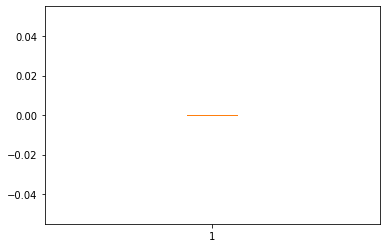

In [38]:
#checking assistant pay and see that it is zero for the whole data set, should be dropped
plt.boxplot(x=coaches['AssistantPay'])
plt.show()

In [39]:
coaches.columns

Index(['School', 'Conference', 'Coach', 'AssistantPay', 'Bonus', 'BonusPaid',
       'Buyout', 'SchoolPay', 'TotalPay', 'SCL_NAME_y', 'SCL_UNITID_x',
       'SCL_UNITID', 'SCL_NAME', 'MULTIYR_APR_RATE_1000_RAW',
       'MULTIYR_APR_RATE_1000_CI', 'MULTIYR_APR_RATE_1000_OFFICIAL',
       'MULTIYR_ELIG_RATE', 'MULTIYR_RET_RATE', 'APR_RATE_2014_1000',
       'ELIG_RATE_2014', 'RET_RATE_2014', 'College', 'Capacity', 'capcheck',
       'Team', 'WinPercent'],
      dtype='object')

In [40]:
#cleans up columns in main dataframe from all the merging and drops record for Alabama At Birmingham that doesn't have any data
coaches = coaches.drop(columns=['AssistantPay','SCL_NAME_y','SCL_UNITID_x','SCL_UNITID', 'SCL_NAME','College','Team', 'capcheck'])
coaches = coaches.drop(index=3) # Drops Bill Clark who is missing values that will be needed in the model

<AxesSubplot:xlabel='Conference', ylabel='SchoolPay'>

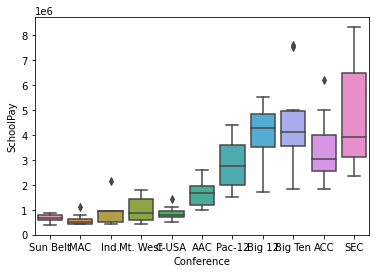

In [41]:
#distribution of conference vs salary
coaches = coaches.sort_values(by =['SchoolPay'])
sns.boxplot(x='Conference',y='SchoolPay', data=coaches)

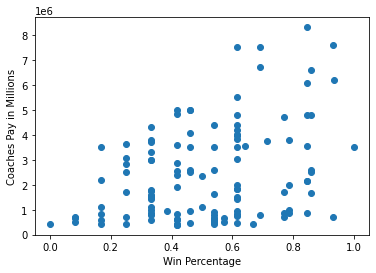

In [42]:
#distribution of win rate vs salary
plt.scatter(x = coaches['WinPercent'], y=coaches['SchoolPay'])
plt.xlabel("Win Percentage")
plt.ylabel("Coaches Pay in Millions")
plt.show()

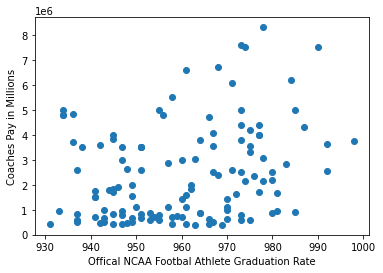

In [43]:
#distribution of grad rate vs salary
plt.scatter(x = coaches['MULTIYR_APR_RATE_1000_OFFICIAL'], y=coaches['SchoolPay'])
plt.xlabel("Offical NCAA Footbal Athlete Graduation Rate")
plt.ylabel("Coaches Pay in Millions")
plt.show()

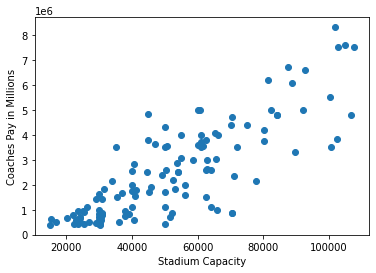

In [44]:
#distribution of stadium capacity vs salary
plt.scatter(x = coaches['Capacity'], y=coaches['SchoolPay'])
plt.xlabel("Stadium Capacity")
plt.ylabel("Coaches Pay in Millions")
plt.show()

In [45]:
# Checking Correlations to select which features to use in the regression model
coaches.corr()

,Bonus,BonusPaid,Buyout,SchoolPay,TotalPay,MULTIYR_APR_RATE_1000_RAW,MULTIYR_APR_RATE_1000_CI,MULTIYR_APR_RATE_1000_OFFICIAL,MULTIYR_ELIG_RATE,MULTIYR_RET_RATE,APR_RATE_2014_1000,ELIG_RATE_2014,RET_RATE_2014,Capacity,WinPercent
Bonus,1.000000,0.404724,0.431629,0.358493,0.362219,-0.080959,-0.086944,-0.102833,-0.037123,-0.164889,-0.067004,-0.027371,-0.067231,0.413399,0.119457
BonusPaid,0.404724,1.000000,0.418663,0.387650,0.388556,0.117859,0.117894,0.109105,0.104120,0.057981,0.142824,0.092039,0.157472,0.302030,0.235797
Buyout,0.431629,0.418663,1.000000,0.782556,0.785170,0.177759,0.172712,0.165365,0.147243,0.102780,0.126666,0.141287,0.061267,0.674218,0.333261
SchoolPay,0.358493,0.387650,0.782556,1.000000,0.999696,0.294780,0.283502,0.275095,0.265936,0.184749,0.286932,0.292885,0.171830,0.827892,0.355950
TotalPay,0.362219,0.388556,0.785170,0.999696,1.000000,0.296437,0.285121,0.276741,0.267058,0.185298,0.286499,0.291770,0.172474,0.828264,0.356613
MULTIYR_APR_RATE_1000_RAW,-0.080959,0.117859,0.177759,0.294780,0.296437,1.000000,0.996084,0.986722,0.929297,0.836496,0.670377,0.697262,0.528338,0.252201,0.178789
MULTIYR_APR_RATE_1000_CI,-0.086944,0.117894,0.172712,0.283502,0.285121,0.996084,1.000000,0.993626,0.933782,0.829549,0.663743,0.696475,0.523022,0.240024,0.186105
MULTIYR_APR_RATE_1000_OFFICIAL,-0.102833,0.109105,0.165365,0.275095,0.276741,0.986722,0.993626,1.000000,0.927951,0.827059,0.657697,0.688444,0.526917,0.226817,0.172847
MULTIYR_ELIG_RATE,-0.037123,0.104120,0.147243,0.265936,0.267058,0.929297,0.933782,0.927951,1.000000,0.642534,0.591606,0.729741,0.397174,0.193100,0.185325
MULTIYR_RET_RATE,-0.164889,0.057981,0.102780,0.184749,0.185298,0.836496,0.829549,0.827059,0.642534,1.000000,0.603321,0.498835,0.644898,0.160742,0.180073


In [46]:
coaches.columns

Index(['School', 'Conference', 'Coach', 'Bonus', 'BonusPaid', 'Buyout',
       'SchoolPay', 'TotalPay', 'MULTIYR_APR_RATE_1000_RAW',
       'MULTIYR_APR_RATE_1000_CI', 'MULTIYR_APR_RATE_1000_OFFICIAL',
       'MULTIYR_ELIG_RATE', 'MULTIYR_RET_RATE', 'APR_RATE_2014_1000',
       'ELIG_RATE_2014', 'RET_RATE_2014', 'Capacity', 'WinPercent'],
      dtype='object')

In [47]:
#Building The Model

AnswersData = coaches[coaches['School']=='Syracuse']
ModelData = coaches[coaches['School']!='Syracuse']

#Specifying the Model
myModel = str('SchoolPay ~ MULTIYR_APR_RATE_1000_OFFICIAL + MULTIYR_ELIG_RATE + MULTIYR_RET_RATE + Capacity + WinPercent + Conference')

# fit the model to the training set
train_model_fit = smf.ols(myModel, data = ModelData).fit()
# summary of model fit to the training set
print(train_model_fit.summary())

ModelData['PredictedSalary'] = train_model_fit.fittedvalues


                            OLS Regression Results                            
Dep. Variable:              SchoolPay   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     31.57
Date:                Sat, 23 Oct 2021   Prob (F-statistic):           2.92e-32
Time:                        17:06:53   Log-Likelihood:                -1832.7
No. Observations:                 122   AIC:                             3697.
Df Residuals:                     106   BIC:                             3742.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

In [48]:
#Rebuilding the Model removing those variables with high P values

#Specifying the Model
myModel = str('SchoolPay ~ Capacity + WinPercent + Conference + MULTIYR_APR_RATE_1000_OFFICIAL')

# fit the model to the training set
train_model_fit = smf.ols(myModel, data = ModelData).fit()
# summary of model fit to the training set
print(train_model_fit.summary())

ModelData['PredictedSalary_2'] = train_model_fit.fittedvalues


                            OLS Regression Results                            
Dep. Variable:              SchoolPay   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     36.88
Date:                Sat, 23 Oct 2021   Prob (F-statistic):           1.03e-33
Time:                        17:06:53   Log-Likelihood:                -1833.0
No. Observations:                 122   AIC:                             3694.
Df Residuals:                     108   BIC:                             3733.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

In [49]:
#predicting Syracuse Coaches Salary in the current structure. It says he's due for a raise.
AnswersData = coaches[coaches['School']=='Syracuse']
AnswersData['Predict_ACC'] = train_model_fit.predict(AnswersData)
AnswersData

,School,Conference,Coach,Bonus,BonusPaid,Buyout,SchoolPay,TotalPay,MULTIYR_APR_RATE_1000_RAW,MULTIYR_APR_RATE_1000_CI,MULTIYR_APR_RATE_1000_OFFICIAL,MULTIYR_ELIG_RATE,MULTIYR_RET_RATE,APR_RATE_2014_1000,ELIG_RATE_2014,RET_RATE_2014,Capacity,WinPercent,Predict_ACC
100,Syracuse,ACC,Dino Babers,0.0,0.0,0.0,2401206.0,2401206.0,968.0,977.0,968.0,0.963722,0.965079,970.0,0.982036,0.958084,49250,0.417,3.024246e+06


In [50]:
#Predicting Syracuse salary if the school joins the big 10
ADataBig10 = coaches[coaches['School']=='Syracuse']
ADataBig10['Conference']='Big Ten'
ADataBig10['Predict_Big10']=train_model_fit.predict(ADataBig10)
ADataBig10

,School,Conference,Coach,Bonus,BonusPaid,Buyout,SchoolPay,TotalPay,MULTIYR_APR_RATE_1000_RAW,MULTIYR_APR_RATE_1000_CI,MULTIYR_APR_RATE_1000_OFFICIAL,MULTIYR_ELIG_RATE,MULTIYR_RET_RATE,APR_RATE_2014_1000,ELIG_RATE_2014,RET_RATE_2014,Capacity,WinPercent,Predict_Big10
100,Syracuse,Big Ten,Dino Babers,0.0,0.0,0.0,2401206.0,2401206.0,968.0,977.0,968.0,0.963722,0.965079,970.0,0.982036,0.958084,49250,0.417,3.259385e+06


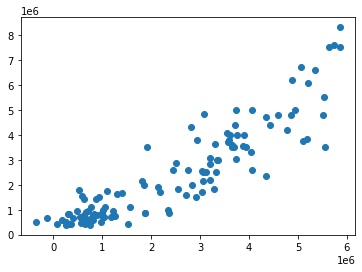

In [51]:
#Predicted salary vs actual pay appears to squeeze the super top earners
plt.scatter(x=ModelData['PredictedSalary'], y=ModelData['SchoolPay'])

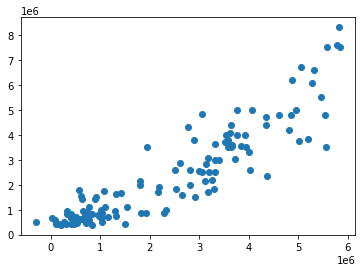

In [52]:
#Model 2 prediction, similar results.
plt.scatter(x=ModelData['PredictedSalary_2'], y=ModelData['SchoolPay'])